In [1]:
# %% Imports

import numpy
import tensorflow as tf
from tensorflow import data
from keras import layers, datasets, utils, losses, metrics
import matplotlib.pyplot as pyplot
from tqdm import tqdm

# Check for GPU
print(tf.config.list_physical_devices("GPU"))

WIDTH = 256
HEIGHT = 256
SIZE = (WIDTH, HEIGHT)
INPUTS_DIR = "../validation_input_images/"
LABELS_DIR = "../validation_label_images/"
BATCH_SIZE = 1

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
seed = 100

input_images = utils.image_dataset_from_directory(
    INPUTS_DIR,
    labels=None,
    label_mode=None,
    image_size=SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    shuffle=False,
    seed=seed
)

label_images = utils.image_dataset_from_directory(
    LABELS_DIR,
    labels=None,
    label_mode=None,
    image_size=SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    shuffle=False,
    seed=seed
)

Found 150 files belonging to 1 classes.


2023-11-03 10:24:56.916423: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-03 10:24:56.916524: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-03 10:24:56.916560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-03 10:24:58.490252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-03 10:24:58.490321: I tensorflow/compile

Found 150 files belonging to 1 classes.


In [13]:
model = tf.saved_model.load("drive/MyDrive/ISIC_Challenge/models/trained/")

In [ ]:
metric = metrics.BinaryIoU()
loss_list = []
for (inputs, labels) in tqdm(data.Dataset.zip((input_images, label_images))):
    labels = tf.cast(labels < 0.5, dtype="int8")
    outputs = model(inputs)
    loss_value = metric(labels, outputs).numpy()
    loss_list.append(loss_value)
total_loss = numpy.average(loss_list)
print(f"Mean Itersect-over-Union: {total_loss}")

100%|██████████| 150/150 [00:06<00:00, 24.38it/s]

Mean Itersect-over-Union: 0.542342483997345


In [14]:
input_image = tf.keras.utils.load_img("drive/MyDrive/ISIC_Challenge/training_input_images/ISIC_0000000.jpg", target_size=SIZE, color_mode="rgb")
inputs = tf.keras.utils.img_to_array(input_image)
label_image = tf.keras.utils.load_img("drive/MyDrive/ISIC_Challenge/training_label_images/ISIC_0000000_segmentation.png", target_size=SIZE, color_mode="grayscale")
labels = tf.keras.utils.img_to_array(label_image, dtype="int8")

In [15]:
outputs = model(inputs.reshape((1, WIDTH, HEIGHT, 3)))

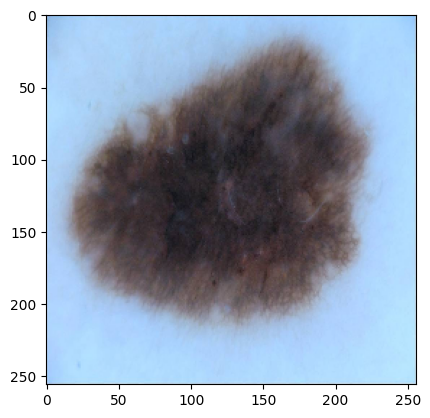

In [16]:
pyplot.imshow(input_image)

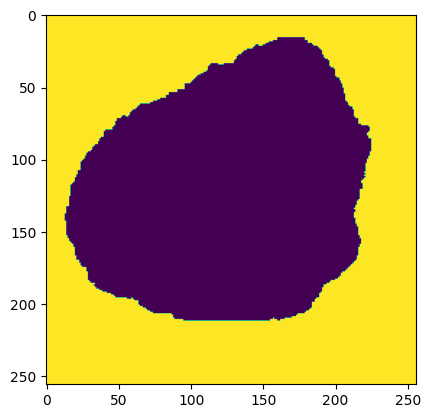

In [17]:
pyplot.imshow(labels)

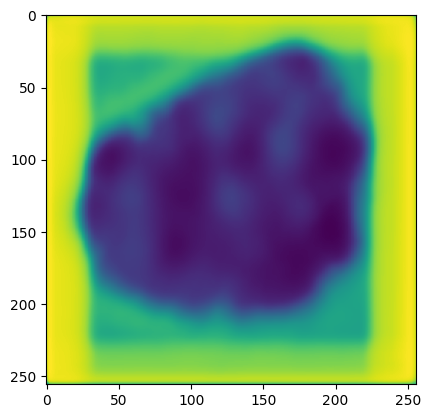

In [18]:
pyplot.imshow(outputs[0] / 255)

In [23]:
model.encoder

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x781379d43940>